In [1]:
#!pip install pandas-profiling[notebook]

# Example from wine quality dataset
#### https://www.kaggle.com/datasets/sh6147782/winequalityred?select=winequality-red.csv

In [2]:
from pandas_profiling import ProfileReport

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image

El primer paso debería ser realizar algún análisis exploratorio de datos (AED) para familiarizarnos con nuestros datos.

Se utilizará un dataset que contiene información sobre las propiedades químicas de varias muestras de vino, junto con una calificación de la calidad a partir de una cata a ciegas realizada por un panel de expertos en vino

In [4]:
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
profile = ProfileReport(red_wine, title="Pandas Profiling Report")

In [6]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Veamos cómo es la distribución de la columna de calidad:

<AxesSubplot:title={'center':'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

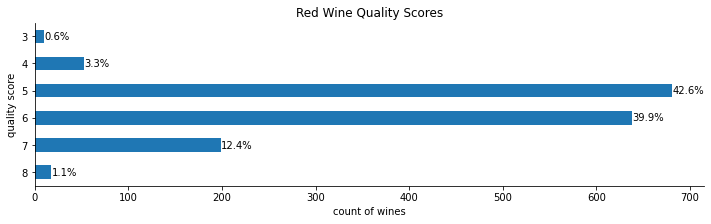

In [7]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(red_wine, 'red')

La información sobre el conjunto de datos dice que la calidad varía de 3 (pésimo) a 8 (excelente), aunque tendría más sentido de 0 o 1, hasta 10; sin embargo, sólo tenemos valores en la mitad de ese rango. Una tarea interesante para este conjunto de datos podría ser ver si podemos predecir los vinos tintos de alta calidad (una puntuación de calidad de 7 o superior).

In [8]:
de = red_wine.describe()

In [9]:
de

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Todos nuestros datos son numéricos, por lo que no tenemos que preocuparnos de manejar valores de texto; tampoco tenemos valores perdidos.

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


De acuerdo con el describe, es evidente que tendremos que hacer algún tipo de escalado porque nuestras columnas no están todas en el mismo rango:

In [11]:
de

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
red_wine['high_quality'] = pd.cut(red_wine.quality, bins=[0, 6, 10], labels=[0, 1])
red_wine.high_quality.value_counts(normalize=True)

0    0.86429
1    0.13571
Name: high_quality, dtype: float64

Es importante realizar una exploración en profundidad de los datos antes de modelarlos. Esto incluye consultar a expertos en el tema, buscar correlaciones entre variables, examinar distribuciones, etc. 

Las visualizaciones vistas resultarán indispensables para este proceso. Una de estas visualizaciones es el diagrama de pares. Para predecir los vinos tintos de alta calidad, se intentará ver si existe una diferencia en la distribución de las variables para los vinos tintos de baja calidad frente a los de alta calidad. 

Otros tipos de gráficos útiles son los gráficos de caja (box plots), los mapas de calor (heatmaps) y la matriz de dispersión (scatter matrix). 

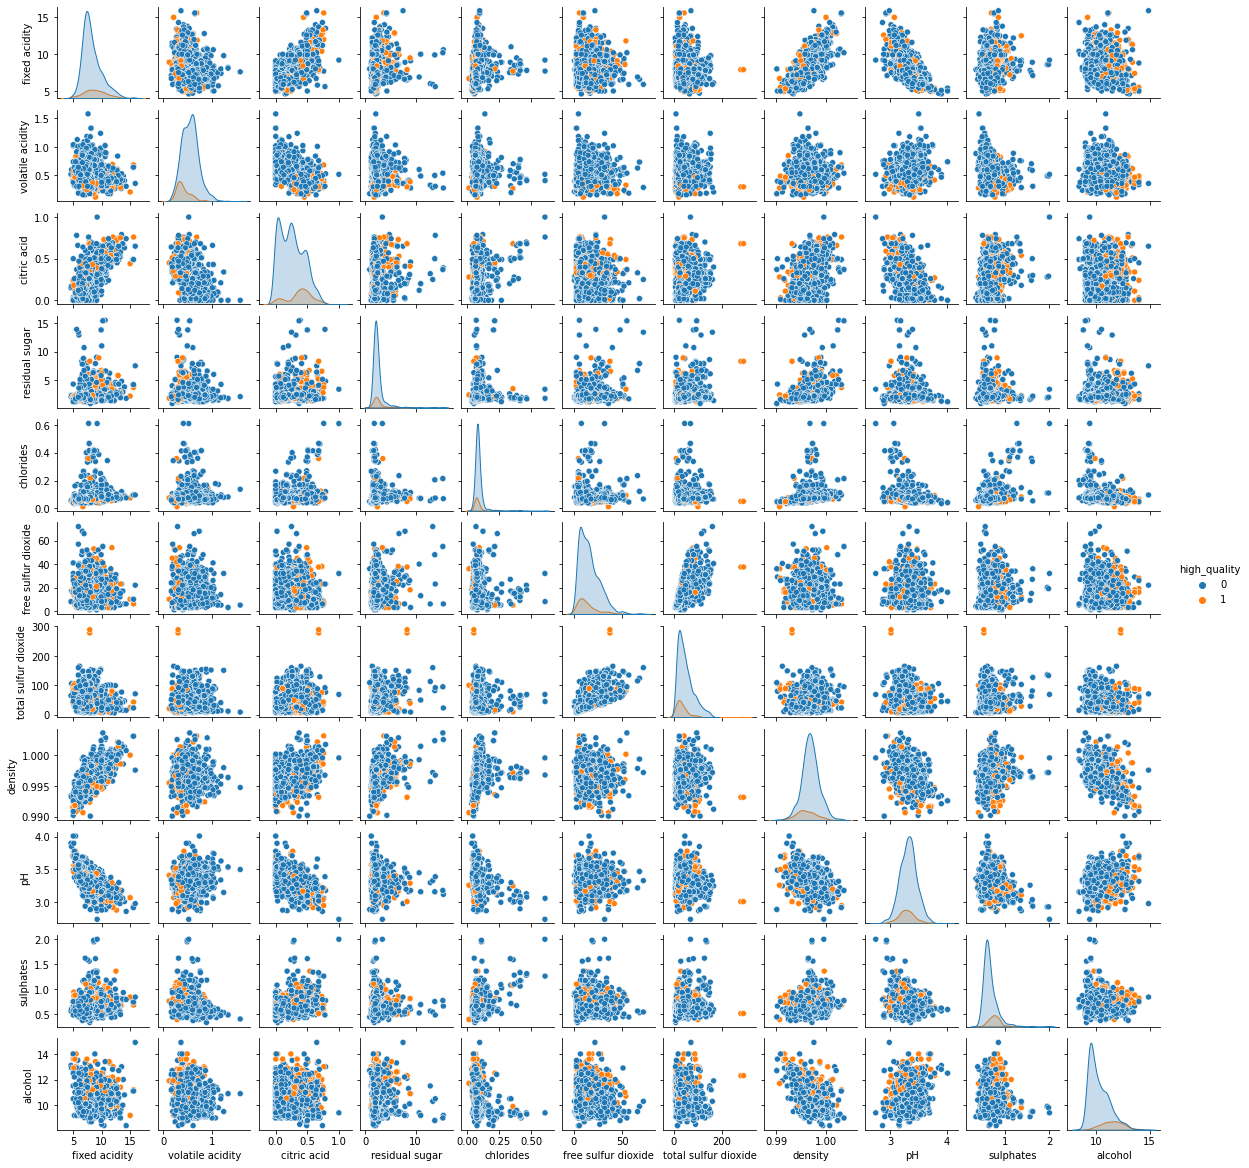

In [13]:
sns.pairplot(red_wine.drop(columns='quality'), hue='high_quality', height=1.5)
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# data: pandas.DataFrame. Tidy (long-form) dataframe where each column is a variable and each row is an observation.
# hue: name of variable in data. Variable in data to map plot aspects to different colors.

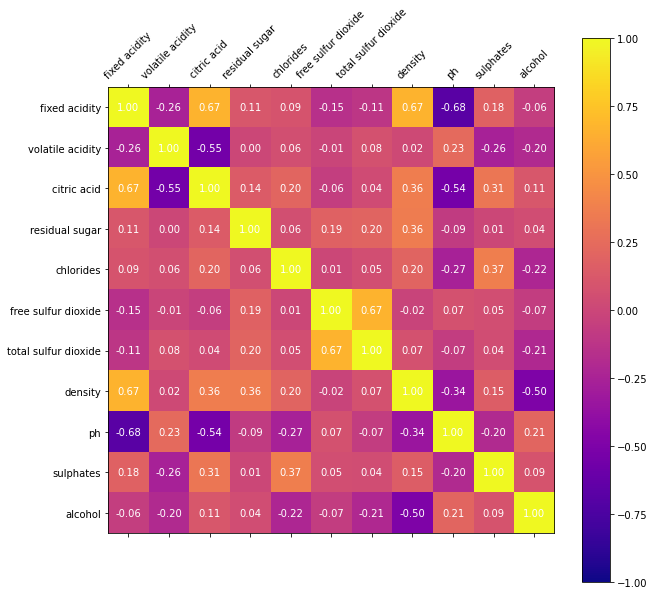

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

# calculate the correlation matrix
red_wine_corr = red_wine.drop(columns='quality').corr()

# create the heatmap and colorbar
im = ax.matshow(red_wine_corr, cmap='plasma')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in red_wine_corr.columns]
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(red_wine_corr):
    ax.text(
        i, j, fr'{coef:.2f}',
        ha='center', va='center',
        color='white', fontsize=10
    )

Los modelos de aprendizaje automático siguen el principio de "basura entrante, basura saliente". Tenemos que asegurarnos de entrenar nuestros modelos (hacer que aprendan) en la mejor versión posible de los datos. 

Por ejemplo, los modelos que utilizan una métrica de distancia para calcular la similitud de las observaciones se confundirán fácilmente si nuestras características están en escalas muy diferentes. A no ser que trabajemos con un problema de procesamiento del lenguaje natural (PLN) para intentar comprender el significado de las palabras, nuestro modelo no podrá utilizar -o peor aún, será incapaz de interpretar- los valores textuales. Los datos que falten o no sean válidos también causarán problemas; tendremos que decidir si los eliminamos o los imputamos. 

Todos los ajustes que hacemos a nuestros datos antes de dárselos a nuestro modelo para que aprenda de ellos se denominan colectivamente preprocesamiento.

Hasta ahora, el aprendizaje automático suena bastante bien: podemos construir un modelo que aprenderá a realizar una tarea por nosotros. Por lo tanto, deberíamos darle todos los datos que tenemos para que aprenda bien, ¿verdad? Por desgracia, no es tan sencillo. Si le damos al modelo todos nuestros datos, corremos el riesgo de sobreajustarlo, lo que significa que no será capaz de generalizar bien a nuevos puntos de datos porque se ajustó a la muestra y no a la población. Por otro lado, si no le damos suficientes datos, no se ajustará lo suficiente y será incapaz de captar la información subyacente en los datos.

In [15]:
#Image(filename='overfitting-underfitting-machine-learning-683x1024.png', width = 600) 

Otra cosa a tener en cuenta es que si utilizamos todos nuestros datos para entrenar el modelo, ¿cómo podemos evaluar su rendimiento? Si lo probamos con los datos que hemos utilizado para el entrenamiento, estaremos sobreestimando su calidad, porque nuestro modelo siempre funcionará mejor con los datos de entrenamiento. Por estas razones, es importante dividir nuestros datos en un conjunto de entrenamiento y otro de prueba. 

scikit-learn nos proporciona la función train_test_split() en el módulo model_selection, que es una solución más robusta y fácil de usar. Requiere que separemos previamente nuestros datos de entrada (X) de nuestros datos de salida (y). En este caso, elegiremos el 75% de los datos para el conjunto de entrenamiento (X_train, y_train) y el 25% para el conjunto de prueba (X_test, y_test). Estableceremos una semilla (random_state=0) para que la división sea reproducible.

### Construir un modelo
1. separar los datos x e y
2. obtener los conjuntos de entrenamiento y prueba
3. construir una tubería (pipeline) con preprocesamiento (estandarización) que termina en el modelo (regresión logística)
4. ajustar el modelo
5. hacer predicciones
6. evaluar las predicciones

Pasos 1 y 2:

In [16]:
from sklearn.model_selection import train_test_split

# Paso 1
red_y = red_wine.pop('high_quality')
red_X = red_wine.drop(columns='quality')

In [17]:
red_y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: high_quality, Length: 1599, dtype: category
Categories (2, int64): [0 < 1]

In [18]:
red_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [19]:
# Paso 2
# Dividir matrices o arrays en subconjuntos aleatorios de entrenamiento y prueba
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(
    red_X, red_y, test_size=0.1, random_state=0, stratify=red_y
)

Aunque no hay criterios específicos sobre el tamaño adecuado del conjunto de pruebas, una regla general es entre el 10% y el 30% de los datos. Sin embargo, si no tenemos muchos datos, nos inclinaremos por un conjunto de pruebas del 10% para asegurarnos de que tenemos suficientes datos con los que aprender. Por el contrario, si tenemos muchos datos, nos inclinaremos por un 30% de pruebas, ya que no sólo no queremos sobreajustar, sino que queremos dar a nuestro modelo una buena cantidad de datos para demostrar su valía. 

Más adelante revisaremos la optimización de este proceso.

In [20]:
r_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6
1518,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5
595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.3
69,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5
1250,7.1,0.600,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9
...,...,...,...,...,...,...,...,...,...,...,...
1487,6.0,0.640,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.6
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.99590,3.31,0.56,10.4
417,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.5
1431,7.6,0.430,0.31,2.1,0.069,13.0,74.0,0.99580,3.26,0.54,9.9


In [21]:
r_y_train.value_counts(normalize=True)

0    0.864489
1    0.135511
Name: high_quality, dtype: float64

In [22]:
r_y_test.value_counts(normalize=True)

0    0.8625
1    0.1375
Name: high_quality, dtype: float64

In [23]:
# Paso 3. construir una tubería (pipeline) con preprocesamiento (estandarización) 
# que termina en el modelo (regresión logística)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# steps: list of tuple
# List of (name, transform) tuples (implementing fit/transform) that are chained, 
# in the order in which they are chained, with the last object an estimator.
red_quality_lr = Pipeline([
    ('scale', StandardScaler()), 
    ('lr', LogisticRegression(
        class_weight='balanced', random_state=0
    ))
])

StandardScaler realiza la tarea de Estandarización. Por lo general, un conjunto de datos contiene variables que son diferentes en escala. Por ej. un conjunto de datos de empleados contendrá una columna AGE con valores en la escala 20-7 y una columna SALARY con valores en la escala 10000-800.

Como estas dos columnas son diferentes en escala, están estandarizadas para tener una escala común al construir el modelo de aprendizaje automático.

In [24]:
# Paso 4. ajustar el modelo
# estimador que es capaz de aprender de los datos a través de su método fit().
red_quality_lr.fit(r_X_train, r_y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [25]:
# Paso 5. hacer predicciones
# Ojo con el dataframe que se le está pasando.
quality_preds = red_quality_lr.predict(r_X_test)

In [26]:
print(quality_preds)

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 1]


In [27]:
r_X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
777,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3
940,9.6,0.330,0.52,2.2,0.074,13.0,25.0,0.99509,3.36,0.76,12.4
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8
713,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4
847,7.4,0.680,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
...,...,...,...,...,...,...,...,...,...,...,...
300,7.5,0.530,0.06,2.6,0.086,20.0,44.0,0.99650,3.38,0.59,10.7
434,10.4,0.410,0.55,3.2,0.076,22.0,54.0,0.99960,3.15,0.89,9.9
764,9.1,0.680,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6


In [37]:
newarray = r_X_test.values
newX = newarray[:,0:11]

In [36]:
newX

array([[ 6.9  ,  0.635,  0.17 , ...,  3.4  ,  0.59 , 10.3  ],
       [ 9.6  ,  0.33 ,  0.52 , ...,  3.36 ,  0.76 , 12.4  ],
       [ 7.5  ,  0.52 ,  0.4  , ...,  3.26 ,  0.64 , 11.8  ],
       ...,
       [ 9.1  ,  0.68 ,  0.11 , ...,  3.31 ,  0.55 ,  9.5  ],
       [ 6.9  ,  0.685,  0.   , ...,  3.46 ,  0.57 , 10.6  ],
       [ 9.1  ,  0.3  ,  0.34 , ...,  3.26 ,  0.84 , 11.7  ]])

In [29]:
y_pred = red_quality_lr.predict(newX)
y_pred

/home/jhoser/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1])

In [30]:
for i in range(len(newX)):
    print("X=%s, Predicted=%s" % (newX[i], y_pred[i]))

X=[ 6.9     0.635   0.17    2.4     0.241   6.     18.      0.9961  3.4
  0.59   10.3   ], Predicted=0
X=[ 9.6      0.33     0.52     2.2      0.074   13.      25.       0.99509
  3.36     0.76    12.4    ], Predicted=1
X=[ 7.5      0.52     0.4      2.2      0.06    12.      20.       0.99474
  3.26     0.64    11.8    ], Predicted=1
X=[ 8.      0.43    0.36    2.3     0.075  10.     48.      0.9976  3.34
  0.46    9.4   ], Predicted=0
X=[ 7.4     0.68    0.16    1.8     0.078  12.     39.      0.9977  3.5
  0.7     9.9   ], Predicted=0
X=[ 7.6      1.58     0.       2.1      0.137    5.       9.       0.99476
  3.5      0.4     10.9    ], Predicted=0
X=[ 9.     0.69   0.     2.4    0.088 19.    38.     0.999  3.35   0.6
  9.3  ], Predicted=0
X=[10.6     0.83    0.37    2.6     0.086  26.     70.      0.9981  3.16
  0.52    9.9   ], Predicted=0
X=[6.0000e+00 5.4000e-01 6.0000e-02 1.8000e+00 5.0000e-02 3.8000e+01
 8.9000e+01 9.9236e-01 3.3000e+00 5.0000e-01 1.0550e+01], Predicted=0
X=[

In [31]:
r_X_test['prediccion'] = y_pred

In [32]:
r_X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediccion
777,6.9,0.635,0.17,2.4,0.241,6.0,18.0,0.99610,3.40,0.59,10.3,0
940,9.6,0.330,0.52,2.2,0.074,13.0,25.0,0.99509,3.36,0.76,12.4,1
1575,7.5,0.520,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,1
713,8.0,0.430,0.36,2.3,0.075,10.0,48.0,0.99760,3.34,0.46,9.4,0
847,7.4,0.680,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9,0


### Evaluación

Podemos utilizar una matriz de confusión para ver cómo se alinean las predicciones del modelo con las etiquetas de clase reales. Este modelo se equivoca en 36 ocasiones. Parece que predice una calidad alta con demasiada frecuencia:

La matriz de confusión es una matriz que permite visualizar el rendimiento de los modelos de aprendizaje automático de clasificación. Con esta visualización, puede tener una mejor idea de cómo está funcionando su modelo de aprendizaje automático.

In [33]:
# https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(r_y_test, quality_preds)

print(cf_matrix)

[[108  30]
 [  6  16]]


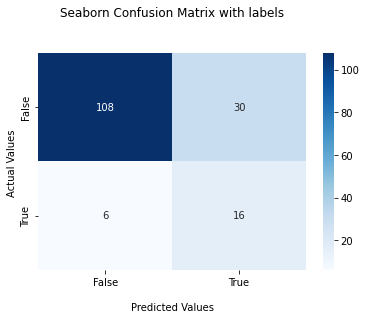

In [34]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

La precisión (accuracy) nos dice cuántos aciertos ha tenido el modelo. Sin embargo, suele ser engañosa en casos de desequilibrio de clases (como aquí):

In [35]:
# mean accuracy
red_quality_lr.score(r_X_test, r_y_test)

/home/jhoser/anaconda3/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- prediccion
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 12 features, but StandardScaler is expecting 11 features as input.

Otra forma de ver el rendimiento es con el informe de clasificación. El rendimiento es mejor en los vinos de baja calidad (0 en la salida de abajo) que son la mayoría:

In [38]:
from sklearn.metrics import classification_report
print(classification_report(r_y_test, quality_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       138
           1       0.35      0.73      0.47        22

    accuracy                           0.78       160
   macro avg       0.65      0.75      0.66       160
weighted avg       0.86      0.78      0.80       160

